In [18]:
from pydap.client import open_url
from pydap.cas.urs import setup_session
import datetime as dt  # Python standard library datetime  module
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
import pandas as pd
from datetime import datetime
from datetime import timedelta

#Read Fire data
data = pd.read_csv("Fires_only_important_stuff_with_cause.csv")
data.head(30)

most_frequent_hotels = data['DISCOVERY_DATE'].value_counts()
data = data[data['LATITUDE']>=25]
data = data[data['LATITUDE']<=53]
data = data[data['LONGITUDE']>=-125]
data = data[data['LONGITUDE']<=-67]
data = data[data['STAT_CAUSE_DESCR'] != "Arson"]
data

,Unnamed: 0,DISCOVERY_DATE,LATITUDE,LONGITUDE,STAT_CAUSE_DESCR
0,0,2005-02-03,40.036944,-121.005833,Miscellaneous
1,1,2004-05-13,38.933056,-120.404444,Lightning
2,2,2004-06-01,38.984167,-120.735556,Debris Burning
3,3,2004-06-29,38.559167,-119.913333,Lightning
4,4,2004-06-29,38.559167,-119.933056,Lightning
...,...,...,...,...,...
1880460,1880460,2015-09-27,40.481637,-122.389375,Missing/Undefined
1880461,1880461,2015-10-06,37.617619,-120.938570,Miscellaneous
1880462,1880462,2015-05-03,37.617619,-120.938570,Missing/Undefined
1880463,1880463,2015-10-15,37.672235,-120.898356,Missing/Undefined


In [19]:
lats = np.genfromtxt('NoahLats.csv', delimiter=',')
lons = np.genfromtxt('NoahLons.csv', delimiter=',')
x = []
y = []
i=0
for indexes,fire in data.iterrows():
    lat_idx = np.abs(lats - fire['LATITUDE']).argmin()
    lon_idx = np.abs(lons - fire['LONGITUDE']).argmin()
    x.append(lat_idx)
    y.append(lon_idx)
    i=i+1
    if (i%10000 ==0):
        print ((i/len(data))*100,'%')
data['X_tile'] = x
data['Y_tile'] = y
data.head(40)

0.6432783523325595 %
1.286556704665119 %
1.9298350569976783 %
2.573113409330238 %
3.216391761662797 %
3.8596701139953566 %
4.502948466327917 %
5.146226818660476 %
5.789505170993035 %
6.432783523325594 %
7.076061875658154 %
7.719340227990713 %
8.362618580323273 %
9.005896932655833 %
9.649175284988393 %
10.292453637320952 %
10.93573198965351 %
11.57901034198607 %
12.22228869431863 %
12.865567046651188 %
13.508845398983748 %
14.152123751316308 %
14.795402103648867 %
15.438680455981427 %
16.08195880831399 %
16.725237160646547 %
17.368515512979105 %
18.011793865311667 %
18.655072217644225 %
19.298350569976787 %
19.94162892230934 %
20.584907274641903 %
21.228185626974465 %
21.87146397930702 %
22.51474233163958 %
23.15802068397214 %
23.8012990363047 %
24.44457738863726 %
25.087855740969818 %
25.731134093302376 %
26.37441244563494 %
27.017690797967497 %
27.66096915030006 %
28.304247502632617 %
28.94752585496518 %
29.590804207297733 %
30.234082559630295 %
30.877360911962853 %
31.520639264295415

,Unnamed: 0,DISCOVERY_DATE,LATITUDE,LONGITUDE,STAT_CAUSE_DESCR,X_tile,Y_tile
0,0,2005-02-03,40.036944,-121.005833,Miscellaneous,120,31
1,1,2004-05-13,38.933056,-120.404444,Lightning,111,36
2,2,2004-06-01,38.984167,-120.735556,Debris Burning,111,34
3,3,2004-06-29,38.559167,-119.913333,Lightning,108,40
4,4,2004-06-29,38.559167,-119.933056,Lightning,108,40
5,5,2004-07-01,38.635278,-120.103611,Lightning,109,39
6,6,2004-07-02,38.688333,-120.153333,Lightning,109,38
7,7,2005-03-09,40.968056,-122.433889,Debris Burning,127,20
8,8,2005-03-16,41.233611,-122.283333,Debris Burning,129,21
9,9,2004-07-02,38.548333,-120.149167,Lightning,108,38


In [20]:
most_frequent_Tiles = data.groupby(['X_tile','Y_tile']).size().sort_values(ascending=False).reset_index(name='count') 
most_frequent_Tiles

,X_tile,Y_tile,count
0,144,179,3213
1,66,116,2319
2,125,409,1806
3,182,239,1575
4,126,408,1311
...,...,...,...
43788,113,224,1
43789,113,251,1
43790,113,252,1
43791,113,274,1


In [21]:
most_frequent_Tiles = most_frequent_Tiles.head(1000)
most_frequent_Tiles

,X_tile,Y_tile,count
0,144,179,3213
1,66,116,2319
2,125,409,1806
3,182,239,1575
4,126,408,1311
...,...,...,...
995,62,334,206
996,40,338,206
997,62,344,206
998,76,99,205


In [24]:
most_frequent_Tiles.drop(columns=['count']).to_csv ('Top1000FireLocations.csv', index = True, header=True)

In [25]:
lons2 = list(map(lambda item: float(lons[item]),most_frequent_Tiles['Y_tile']))
lats2 = list(map(lambda item: float(lats[item]),most_frequent_Tiles['X_tile']))

C:\Users\TheMi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


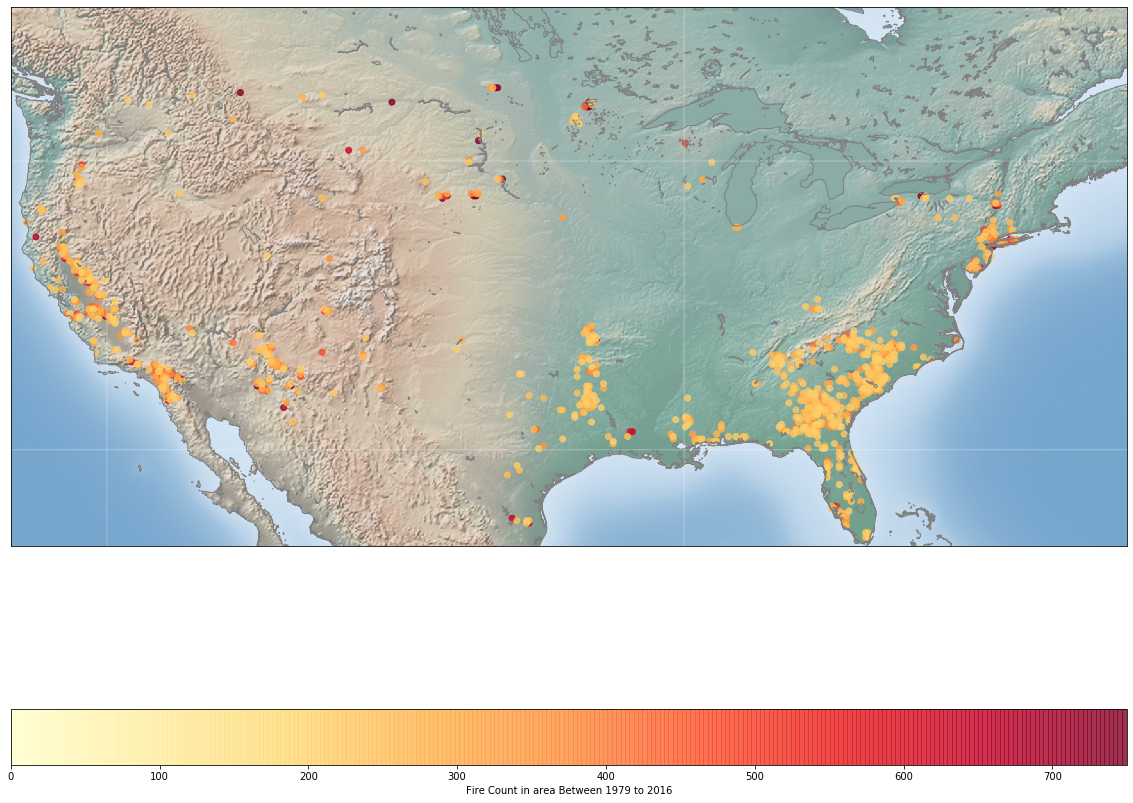

In [8]:

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
        
fig = plt.figure(figsize=(20, 20), edgecolor='w')
m = Basemap(projection='cyl', resolution='f',
            llcrnrlat=25, urcrnrlat=53,
            llcrnrlon=-125, urcrnrlon=-67,)
m.shadedrelief()
m.drawcoastlines(color='gray')

m.scatter(lons2, lats2, latlon=True,
          c=most_frequent_Tiles['count'],
          cmap='YlOrRd', alpha=0.8)

# 3. create colorbar and legend
cc = plt.colorbar(label="Fire Count in area Between 1979 to 2016",orientation='horizontal')
plt.clim(0, 750)

'''
for indexes,item in most_frequent_Tiles.iterrows():
    # Map (long, lat) to (x, y) for plotting
    x, y = m(lons[item['Y_tile']],lats[item['X_tile']],)
    plt.plot(x, y, 'or', markersize=2)
'''
draw_map(m)
plt.savefig('test.png')

In [9]:
most_frequent_Tiles['count'].sum()     

331708

In [11]:
# creating a new DB
new_df = pd.DataFrame(columns = data.columns)

for indexes,item in most_frequent_Tiles.iterrows(): 
    temp_df = data[data['X_tile']==item['X_tile']]
    temp_df = temp_df[temp_df['Y_tile']==item['Y_tile']]
    new_df = new_df.append(temp_df, ignore_index = True)
    i=i+1
    if (i%10 ==0):
        print ((i/len(most_frequent_Tiles))*100,'%')
new_df

155554.0 %
155555.0 %
155556.0 %
155557.0 %
155558.0 %
155559.0 %
155560.0 %
155561.0 %
155562.0 %
155563.0 %
155564.0 %
155565.0 %
155566.0 %
155567.0 %
155568.0 %
155569.0 %
155570.0 %
155571.0 %
155572.0 %
155573.0 %
155574.0 %
155575.0 %
155576.0 %
155577.0 %
155578.0 %
155579.0 %
155580.0 %
155581.0 %
155582.0 %
155583.0 %
155584.0 %
155585.0 %
155586.0 %
155587.0 %
155588.0 %
155589.0 %
155590.0 %
155591.0 %
155592.0 %
155593.0 %
155594.0 %
155595.0 %
155596.0 %
155597.0 %
155598.0 %
155599.0 %
155600.0 %
155601.0 %
155602.0 %
155603.0 %
155604.0 %
155605.0 %
155606.0 %
155607.0 %
155608.0 %
155609.0 %
155610.0 %
155611.0 %
155612.0 %
155613.0 %
155614.0 %
155615.0 %
155616.0 %
155617.0 %
155618.0 %
155619.0 %
155620.0 %
155621.0 %
155622.0 %
155623.0 %
155624.0 %
155625.0 %
155626.0 %
155627.0 %
155628.0 %
155629.0 %
155630.0 %
155631.0 %
155632.0 %
155633.0 %
155634.0 %
155635.0 %
155636.0 %
155637.0 %
155638.0 %
155639.0 %
155640.0 %
155641.0 %
155642.0 %
155643.0 %
155644.0 %

,Unnamed: 0,DISCOVERY_DATE,LATITUDE,LONGITUDE,STAT_CAUSE_DESCR,X_tile,Y_tile
0,179370,1992-01-26,43.033300,-102.533800,Children,144,179
1,179372,1992-01-31,43.033300,-102.550400,Children,144,179
2,179373,1992-02-06,43.033300,-102.550400,Equipment Use,144,179
3,179380,1992-02-23,43.052800,-102.533800,Children,144,179
4,179382,1992-02-25,43.050000,-102.567100,Equipment Use,144,179
...,...,...,...,...,...,...,...
331703,1790085,2015-06-25,34.235556,-110.867778,Lightning,73,113
331704,1790087,2015-06-25,34.250000,-110.867222,Lightning,73,113
331705,1790094,2015-07-12,34.234722,-110.818889,Campfire,73,113
331706,1790099,2015-07-15,34.151389,-110.868611,Lightning,73,113


In [12]:
new_df.to_csv ('Top1000FireLocationsCases.csv', index = True, header=True)